<a href="https://colab.research.google.com/github/suryakanthPS/DS_Mini-Projects/blob/main/As5_Q2_MLR_50startup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [ ]:
#import data
data = pd.read_csv("/content/50_Startups.csv")
data

## EDA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
data.describe()

In [ ]:
data1=data.rename({'R&D Spend':'RnD','Administration':'Admin','Marketing Spend':'Mk'},axis=1)
data1

In [ ]:
data1[data1.duplicated()] # No duplicate data

,RnD,Admin,Mk,State,Profit


# Correlation analysis

In [ ]:
data1.corr()

,RnD,Admin,Mk,Profit
RnD,1.000000,0.241955,0.724248,0.972900
Admin,0.241955,1.000000,-0.032154,0.200717
Mk,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


## Visualization

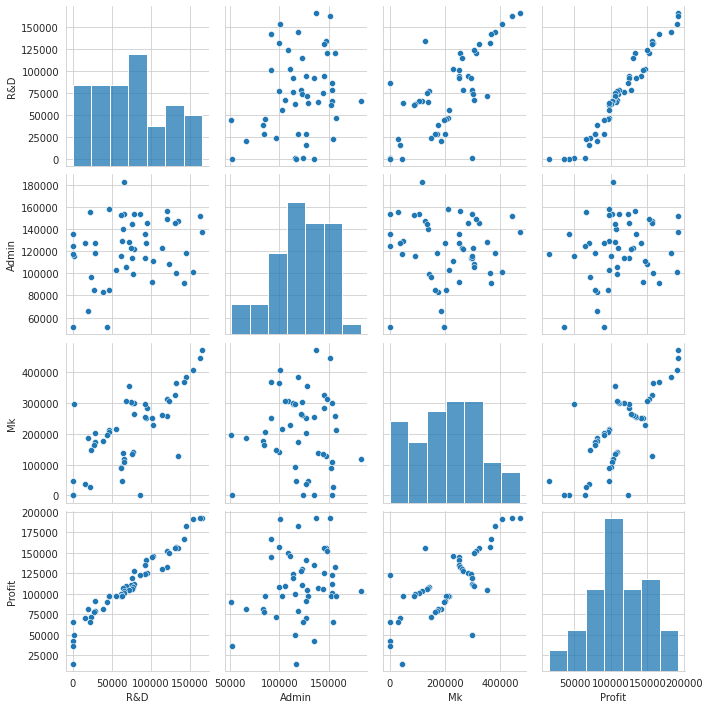

In [ ]:
sns.set_style(style='whitegrid')
sns.pairplot(data1)

## Model building

In [ ]:
import statsmodels.formula.api as smf
model=smf.ols('Profit~RnD+Admin+Mk',data=data1).fit()

## Model testing

In [ ]:
#finding coefficient parameter
model.params
#y=mx+c ; years_exp=m ; intercept=c

Intercept    50122.192990
RnD              0.805715
Admin           -0.026816
Mk               0.027228
dtype: float64

In [ ]:
#finding t values
model.tvalues

Intercept     7.626218
RnD          17.846374
Admin        -0.525507
Mk            1.655077
dtype: float64

In [ ]:
model.pvalues

Intercept    1.057379e-09
RnD          2.634968e-22
Admin        6.017551e-01
Mk           1.047168e-01
dtype: float64

In [ ]:
np.round(model.pvalues,6)

Intercept    0.000000
RnD          0.000000
Admin        0.601755
Mk           0.104717
dtype: float64

In [ ]:
#R squared values
(model.rsquared,model.rsquared_adj) #model accuracy is 94.75%

(0.9507459940683246, 0.9475337762901719)

## Model prediction

In [ ]:
#Manual prediction of profit based on parameters
new_data=pd.DataFrame({'RnD':70000,"Admin":90000,"Mk":140000},index=[0])
new_data

,RnD,Admin,Mk
0,70000,90000,140000


In [ ]:
model.predict(new_data)

0    107920.738401
dtype: float64

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 15 Oct 2022   Prob (F-statistic):           4.53e-30
Time:                        19:08:04   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RnD            0.8057      0.045     17.846      0.000       0.715       0.897
Admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
Mk             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""